In [1]:
import pandas as pd
import glob
import os
from sklearn.metrics import average_precision_score, precision_recall_curve, auc
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr, spearmanr
from scipy.stats import mannwhitneyu

In [2]:
from variant_tasks import *

## Nucleotide Transformer

In [3]:
model_name="nucleotide-transformer-v2-500m-multi-species"
model="Nucleotide Transformer"

In [4]:
ctrl_counts, sig_counts, filtered_var_eu_caQTLs_df = sig_ctrl_variants_Eu_CaQTLs_probed_counts(f"/oak/stanford/groups/akundaje/projects/dnalm_benchmark/variants/probing/{model_name}/GM12878/Eu.CaQTLS.counts.tsv")
mannwhitneyu(ctrl_counts, sig_counts, alternative="greater")

111915 9851


MannwhitneyuResult(statistic=562168117.5, pvalue=0.0005413964131961397)

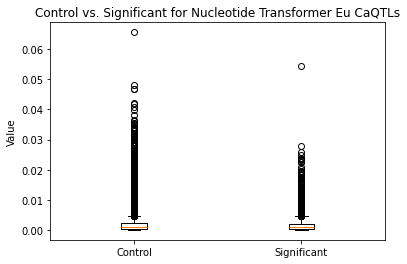

In [5]:
data = [ctrl_counts, sig_counts]

# Create the boxplot
plt.boxplot(data)

# Customizing the plot
plt.xticks([1, 2], ['Control', 'Significant']) 
plt.ylabel('Value') 
plt.title(f'Control vs. Significant for {model} Eu CaQTLs')  
plt.show()

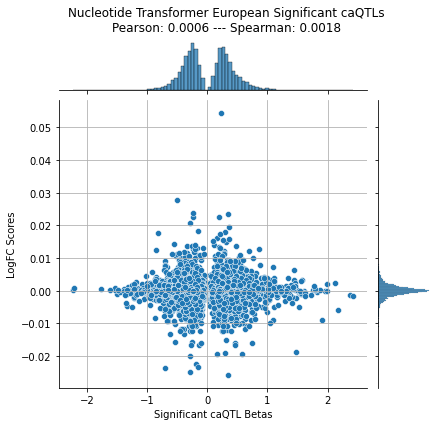

In [6]:
threshold = 3
filtered_var_eucaqtls_df_sig = filtered_var_eu_caQTLs_df[filtered_var_eu_caQTLs_df["Log10_BF"]>threshold].copy(deep=True)
beta_logfc(filtered_var_eucaqtls_df_sig, f"{model} European Significant caQTLs")

In [7]:
ctrl_afr, sig_afr, filtered_var_afr_caQTLs_df = sig_ctrl_variants_Afr_CaQTLs_probed_counts(f"/oak/stanford/groups/akundaje/projects/dnalm_benchmark/variants/probing/{model_name}/GM12878/Afr.CaQTLS.counts.tsv")
mannwhitneyu(ctrl_afr, sig_afr, alternative="greater")

unique label values [False  True]
(8363, 49) (101283, 49)
101283 8363


MannwhitneyuResult(statistic=416711262.0, pvalue=0.9927690330400439)

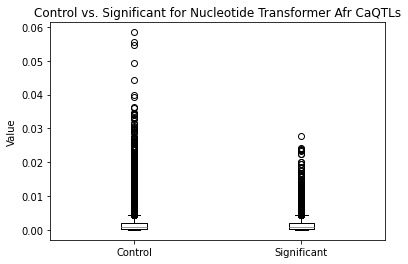

In [8]:
data = [ctrl_afr, sig_afr]

# Create the boxplot
plt.boxplot(data)

# Customizing the plot
plt.xticks([1, 2], ['Control', 'Significant']) 
plt.ylabel('Value') 
plt.title(f'Control vs. Significant for {model} Afr CaQTLs')  
plt.show()

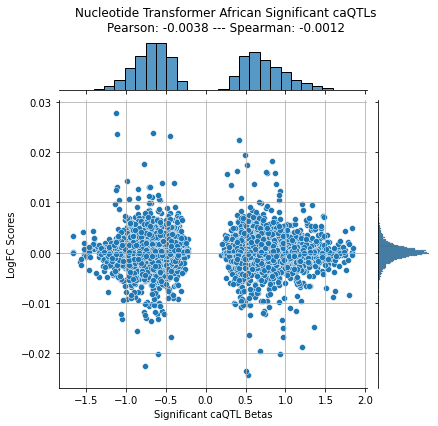

In [9]:
filtered_var_afrcaqtls_df_sig = filtered_var_afr_caQTLs_df[filtered_var_afr_caQTLs_df["label"]==1]

beta_logfc(filtered_var_afrcaqtls_df_sig, f"{model} African Significant caQTLs")

In [10]:
afr_asb = variants_Afr_ASB_CaQTLs_probed_counts(f"/oak/stanford/groups/akundaje/projects/dnalm_benchmark/variants/probing/{model_name}/GM12878/Afr.ASB.CaQTLS.counts.tsv")

Index(['chr_hg38', 'pos_hg38', 'allele1', 'allele2', 'IsUsed', 'rsid',
       'snp_id', 'meanLog2FC', 'GM12878.ENCSR637XSC.mean.logfc',
       'GM12878.ENCSR637XSC.mean.sign.jsd', 'GM12878.ENCSR000EMT.mean.logfc',
       'GM12878.ENCSR000EMT.mean.sign.jsd',
       'GM12878.ENCSR637XSC.sub.50M.mean.logfc',
       'GM12878.ENCSR637XSC.sub.50M.mean.sign.jsd', 'allele1_counts',
       'allele2_counts'],
      dtype='object')


Index(['chr_hg38', 'pos_hg38', 'allele1', 'allele2', 'IsUsed', 'rsid',
       'snp_id', 'meanLog2FC', 'GM12878.ENCSR637XSC.mean.logfc',
       'GM12878.ENCSR637XSC.mean.sign.jsd', 'GM12878.ENCSR000EMT.mean.logfc',
       'GM12878.ENCSR000EMT.mean.sign.jsd',
       'GM12878.ENCSR637XSC.sub.50M.mean.logfc',
       'GM12878.ENCSR637XSC.sub.50M.mean.sign.jsd', 'allele1_counts',
       'allele2_counts'],
      dtype='object')


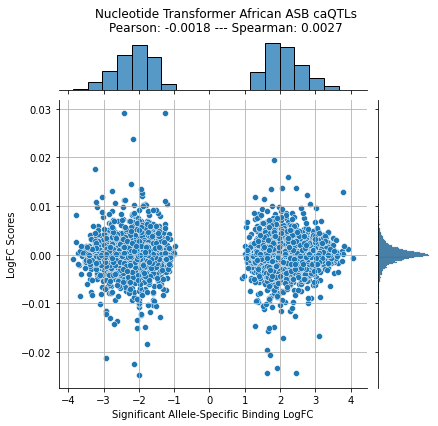

In [11]:
afr_asb = variants_Afr_ASB_CaQTLs_probed_counts(f"/oak/stanford/groups/akundaje/projects/dnalm_benchmark/variants/probing/{model_name}/GM12878/Afr.ASB.CaQTLS.counts.tsv")
effect_size_logfc(afr_asb, f"{model} African ASB caQTLs")

In [12]:
df = pd.read_csv(f"/oak/stanford/groups/akundaje/projects/dnalm_benchmark/variants/probing/{model_name}/GM12878/gm12878.dsqtls.benchmarking.counts.tsv", sep="\t")
df = pd.read_csv("/oak/stanford/groups/akundaje/anusri/variant-benchmakring/gm12878.dsqtls.benchmarking.tsv", sep="\t")
df[df["var.isused"]]

,var.chrom,var.pos,var.allele1,var.allele2,var.rsid,var.label,var.isused,obs.estimate,pred.gkmsvm.encsr000emt.varscore.deltasvm,pred.enformer.encsr000emt.varscore.sad,...,pred.chrombpnet.encsr637xsc_50m.varscore.jsd_x_aaq,pred.chrombpnet.encsr637xsc_50m.varscore.logfc_x_aaq,pred.chrombpnet.encsr637xsc_25m.varscore.logfc,pred.chrombpnet.encsr637xsc_25m.varscore.jsd,pred.chrombpnet.encsr637xsc_25m.varscore.crs,pred.chrombpnet.encsr637xsc_25m.varscore.pval,pred.chrombpnet.encsr637xsc_5m.varscore.logfc,pred.chrombpnet.encsr637xsc_5m.varscore.jsd,pred.chrombpnet.encsr637xsc_5m.varscore.crs,pred.chrombpnet.encsr637xsc_5m.varscore.pval
0,chr1,856583,A,G,rs141671872,1,True,0.9301,2.653531,0.000342,...,0.021877,0.127298,0.291935,0.067401,0.004840,0.018692,0.065098,0.049902,0.001360,0.065265
1,chr1,911595,G,A,rs7417106,1,True,-0.6285,2.821422,-0.001241,...,0.027762,0.056287,0.093192,0.036053,0.002239,0.033704,0.045314,0.034489,0.000898,0.077782
2,chr1,1186502,T,A,rs6603785,1,True,-0.7363,-7.167236,-0.006530,...,0.029658,0.349964,-0.402188,-0.038791,0.008839,0.006710,-0.163023,-0.039080,0.002210,0.029520
3,chr1,1227412,A,G,rs112571439,1,True,-0.9236,-3.957382,-0.001878,...,0.137196,0.518532,-0.622704,-0.222396,0.086945,0.000056,-0.259064,-0.172960,0.027583,0.000195
4,chr1,1590575,A,G,rs9661285,1,True,-1.0890,-4.785596,-0.008736,...,0.053680,0.103350,-0.061906,-0.050589,0.003275,0.027075,-0.032300,-0.023135,0.000802,0.084252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28302,chr9,140938183,A,G,rs3750506,-1,True,NaN,0.487228,0.000005,...,0.000093,0.000505,-0.046869,-0.008768,0.000026,0.540378,-0.026908,-0.006874,0.000050,0.525221
28303,chr9,140953297,G,A,rs10780199,-1,True,NaN,2.804388,-0.000003,...,0.000028,0.000094,0.016504,0.005610,0.000002,0.876184,0.002748,0.003831,0.000002,0.930803
28304,chr9,141035586,T,C,rs7852209,-1,True,NaN,0.444036,0.000001,...,0.000146,0.000272,-0.017531,-0.006130,0.000007,0.744708,-0.005638,-0.005843,0.000012,0.783146
28305,chr9,141061300,T,C,rs4066694,-1,True,NaN,1.363332,0.000005,...,0.000122,0.000375,0.012734,0.005202,0.000001,0.890162,0.004291,0.006334,0.000001,0.939177


## DNABert2

In [13]:
model_name="DNABERT-2-117M"
model="DNABert2"

In [14]:
ctrl_counts, sig_counts, filtered_var_eu_caQTLs_df = sig_ctrl_variants_Eu_CaQTLs_probed_counts(f"/oak/stanford/groups/akundaje/projects/dnalm_benchmark/variants/probing/{model_name}/GM12878/Eu.CaQTLS.counts.tsv")
mannwhitneyu(ctrl_counts, sig_counts, alternative="greater")

111915 9851


MannwhitneyuResult(statistic=529003083.0, pvalue=0.9999999999851031)

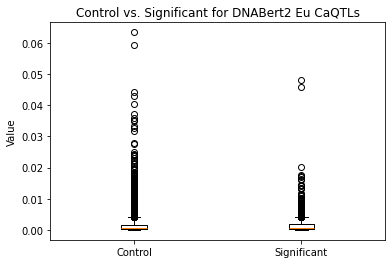

In [15]:
data = [ctrl_counts, sig_counts]

# Create the boxplot
plt.boxplot(data)

# Customizing the plot
plt.xticks([1, 2], ['Control', 'Significant']) 
plt.ylabel('Value') 
plt.title(f'Control vs. Significant for {model} Eu CaQTLs')  
plt.show()

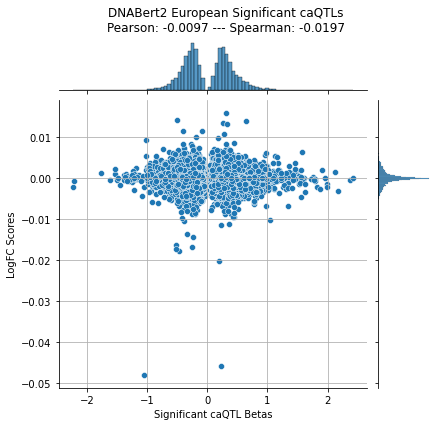

In [16]:
threshold = 3
filtered_var_eucaqtls_df_sig = filtered_var_eu_caQTLs_df[filtered_var_eu_caQTLs_df["Log10_BF"]>threshold].copy(deep=True)
beta_logfc(filtered_var_eucaqtls_df_sig, f"{model} European Significant caQTLs")

In [17]:
ctrl_afr, sig_afr, filtered_var_afr_caQTLs_df = sig_ctrl_variants_Afr_CaQTLs_probed_counts(f"/oak/stanford/groups/akundaje/projects/dnalm_benchmark/variants/probing/{model_name}/GM12878/Afr.CaQTLS.counts.tsv")
mannwhitneyu(ctrl_afr, sig_afr, alternative="greater")

unique label values [False  True]
(8363, 48) (101283, 48)
101283 8363


MannwhitneyuResult(statistic=427052906.5, pvalue=0.10172884810749372)

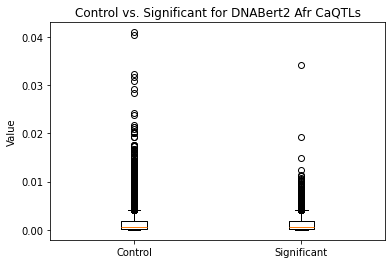

In [18]:
data = [ctrl_afr, sig_afr]

# Create the boxplot
plt.boxplot(data)

# Customizing the plot
plt.xticks([1, 2], ['Control', 'Significant']) 
plt.ylabel('Value') 
plt.title(f'Control vs. Significant for {model} Afr CaQTLs')  
plt.show()

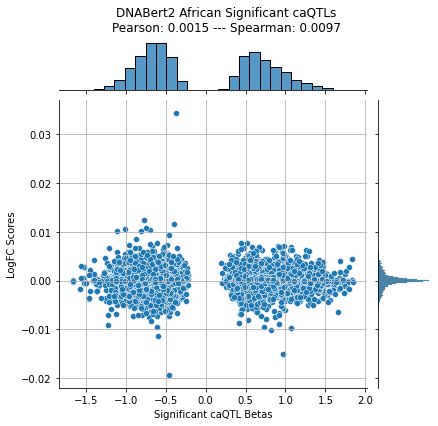

In [19]:
filtered_var_afrcaqtls_df_sig = filtered_var_afr_caQTLs_df[filtered_var_afr_caQTLs_df["label"]==1]

beta_logfc(filtered_var_afrcaqtls_df_sig, f"{model} African Significant caQTLs")

Index(['chr_hg38', 'pos_hg38', 'allele1', 'allele2', 'IsUsed', 'rsid',
       'snp_id', 'meanLog2FC', 'GM12878.ENCSR637XSC.mean.logfc',
       'GM12878.ENCSR637XSC.mean.sign.jsd', 'GM12878.ENCSR000EMT.mean.logfc',
       'GM12878.ENCSR000EMT.mean.sign.jsd',
       'GM12878.ENCSR637XSC.sub.50M.mean.logfc',
       'GM12878.ENCSR637XSC.sub.50M.mean.sign.jsd', 'allele1_counts',
       'allele2_counts'],
      dtype='object')


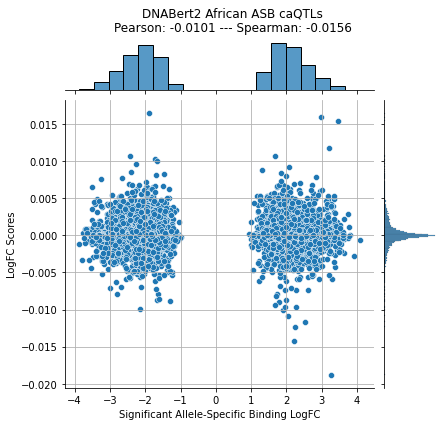

In [20]:
afr_asb = variants_Afr_ASB_CaQTLs_probed_counts(f"/oak/stanford/groups/akundaje/projects/dnalm_benchmark/variants/probing/{model_name}/GM12878/Afr.ASB.CaQTLS.counts.tsv")
effect_size_logfc(afr_asb, f"{model} African ASB caQTLs")

## Gena LM

In [21]:
model_name="gena-lm-bert-large-t2t"
model="Gena LM"

In [22]:
ctrl_counts, sig_counts, filtered_var_eu_caQTLs_df = sig_ctrl_variants_Eu_CaQTLs_probed_counts(f"/oak/stanford/groups/akundaje/projects/dnalm_benchmark/variants/probing/{model_name}/GM12878/Eu.CaQTLS.counts.tsv")
mannwhitneyu(ctrl_counts, sig_counts, alternative="greater")

111915 9851


MannwhitneyuResult(statistic=562754942.5, pvalue=0.00028708653041829293)

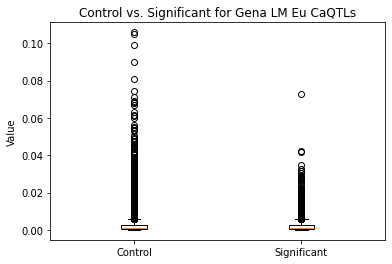

In [23]:
data = [ctrl_counts, sig_counts]

# Create the boxplot
plt.boxplot(data)

# Customizing the plot
plt.xticks([1, 2], ['Control', 'Significant']) 
plt.ylabel('Value') 
plt.title(f'Control vs. Significant for {model} Eu CaQTLs')  
plt.show()

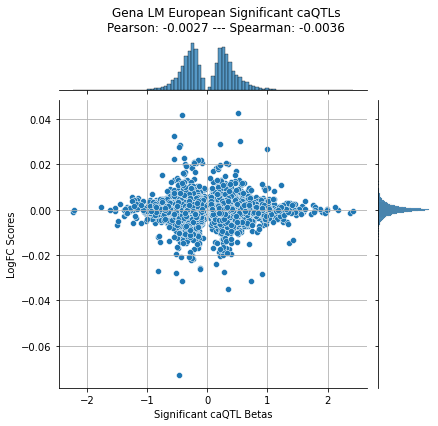

In [24]:
threshold = 3
filtered_var_eucaqtls_df_sig = filtered_var_eu_caQTLs_df[filtered_var_eu_caQTLs_df["Log10_BF"]>threshold].copy(deep=True)
beta_logfc(filtered_var_eucaqtls_df_sig, f"{model} European Significant caQTLs")

In [25]:
ctrl_afr, sig_afr, filtered_var_afr_caQTLs_df = sig_ctrl_variants_Afr_CaQTLs_probed_counts(f"/oak/stanford/groups/akundaje/projects/dnalm_benchmark/variants/probing/{model_name}/GM12878/Afr.CaQTLS.counts.tsv")
mannwhitneyu(ctrl_afr, sig_afr, alternative="greater")

unique label values [False  True]
(8363, 48) (101283, 48)
101283 8363


MannwhitneyuResult(statistic=412468637.0, pvalue=0.9999641551512503)

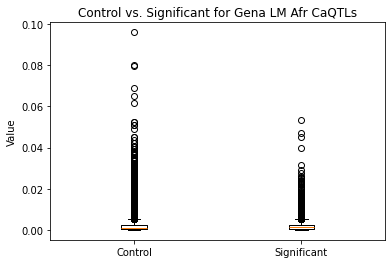

In [26]:
data = [ctrl_afr, sig_afr]

# Create the boxplot
plt.boxplot(data)

# Customizing the plot
plt.xticks([1, 2], ['Control', 'Significant']) 
plt.ylabel('Value') 
plt.title(f'Control vs. Significant for {model} Afr CaQTLs')  
plt.show()

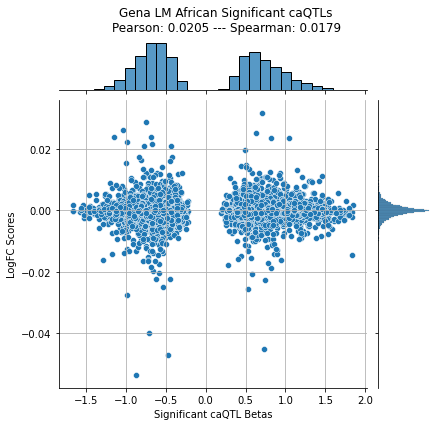

In [27]:
filtered_var_afrcaqtls_df_sig = filtered_var_afr_caQTLs_df[filtered_var_afr_caQTLs_df["label"]==1]

beta_logfc(filtered_var_afrcaqtls_df_sig, f"{model} African Significant caQTLs")

Index(['chr_hg38', 'pos_hg38', 'allele1', 'allele2', 'IsUsed', 'rsid',
       'snp_id', 'meanLog2FC', 'GM12878.ENCSR637XSC.mean.logfc',
       'GM12878.ENCSR637XSC.mean.sign.jsd', 'GM12878.ENCSR000EMT.mean.logfc',
       'GM12878.ENCSR000EMT.mean.sign.jsd',
       'GM12878.ENCSR637XSC.sub.50M.mean.logfc',
       'GM12878.ENCSR637XSC.sub.50M.mean.sign.jsd', 'allele1_counts',
       'allele2_counts'],
      dtype='object')


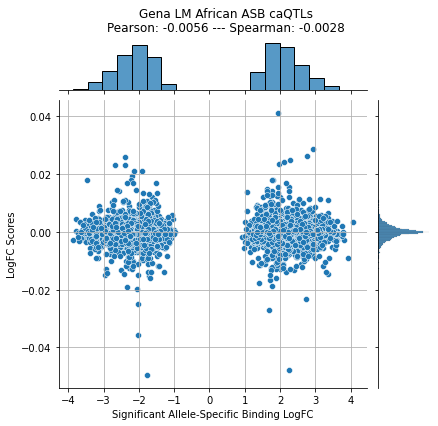

In [28]:
afr_asb = variants_Afr_ASB_CaQTLs_probed_counts(f"/oak/stanford/groups/akundaje/projects/dnalm_benchmark/variants/probing/{model_name}/GM12878/Afr.ASB.CaQTLS.counts.tsv")
effect_size_logfc(afr_asb, f"{model} African ASB caQTLs")

## HyenaDNA

In [29]:
model_name="hyenadna-large-1m-seqlen-hf"
model="Hyena DNA"

In [30]:
ctrl_counts, sig_counts, filtered_var_eu_caQTLs_df = sig_ctrl_variants_Eu_CaQTLs_probed_counts(f"/oak/stanford/groups/akundaje/projects/dnalm_benchmark/variants/probing/{model_name}/GM12878/Eu.CaQTLS.counts.tsv")
mannwhitneyu(ctrl_counts, sig_counts, alternative="greater")

111915 9851


MannwhitneyuResult(statistic=584052325.5, pvalue=4.6957572224222585e-23)

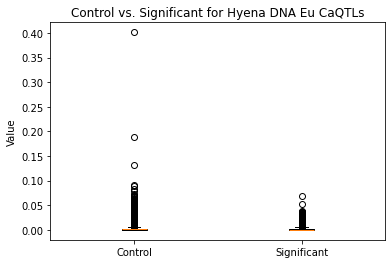

In [31]:
data = [ctrl_counts, sig_counts]

# Create the boxplot
plt.boxplot(data)

# Customizing the plot
plt.xticks([1, 2], ['Control', 'Significant']) 
plt.ylabel('Value') 
plt.title(f'Control vs. Significant for {model} Eu CaQTLs')  
plt.show()

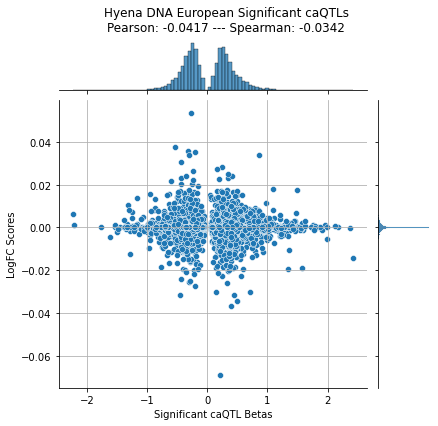

In [32]:
threshold = 3
filtered_var_eucaqtls_df_sig = filtered_var_eu_caQTLs_df[filtered_var_eu_caQTLs_df["Log10_BF"]>threshold].copy(deep=True)
beta_logfc(filtered_var_eucaqtls_df_sig, f"{model} European Significant caQTLs")

In [33]:
ctrl_afr, sig_afr, filtered_var_afr_caQTLs_df = sig_ctrl_variants_Afr_CaQTLs_probed_counts(f"/oak/stanford/groups/akundaje/projects/dnalm_benchmark/variants/probing/{model_name}/GM12878/Afr.CaQTLS.counts.tsv")
mannwhitneyu(ctrl_afr, sig_afr, alternative="greater")

unique label values [False  True]
(8363, 48) (101283, 48)
101283 8363


MannwhitneyuResult(statistic=354339505.5, pvalue=1.0)

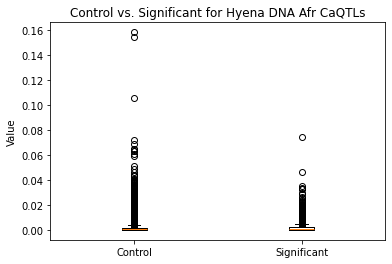

In [34]:
data = [ctrl_afr, sig_afr]

# Create the boxplot
plt.boxplot(data)

# Customizing the plot
plt.xticks([1, 2], ['Control', 'Significant']) 
plt.ylabel('Value') 
plt.title(f'Control vs. Significant for {model} Afr CaQTLs')  
plt.show()

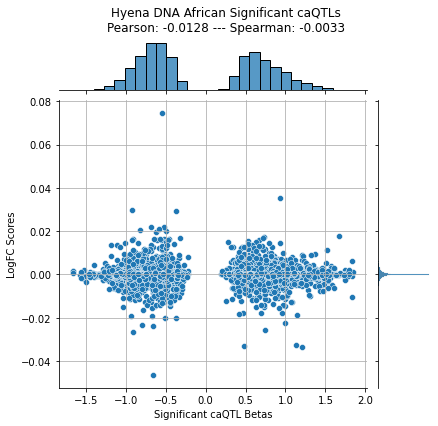

In [35]:
filtered_var_afrcaqtls_df_sig = filtered_var_afr_caQTLs_df[filtered_var_afr_caQTLs_df["label"]==1]

beta_logfc(filtered_var_afrcaqtls_df_sig, f"{model} African Significant caQTLs")

Index(['chr_hg38', 'pos_hg38', 'allele1', 'allele2', 'IsUsed', 'rsid',
       'snp_id', 'meanLog2FC', 'GM12878.ENCSR637XSC.mean.logfc',
       'GM12878.ENCSR637XSC.mean.sign.jsd', 'GM12878.ENCSR000EMT.mean.logfc',
       'GM12878.ENCSR000EMT.mean.sign.jsd',
       'GM12878.ENCSR637XSC.sub.50M.mean.logfc',
       'GM12878.ENCSR637XSC.sub.50M.mean.sign.jsd', 'allele1_counts',
       'allele2_counts'],
      dtype='object')


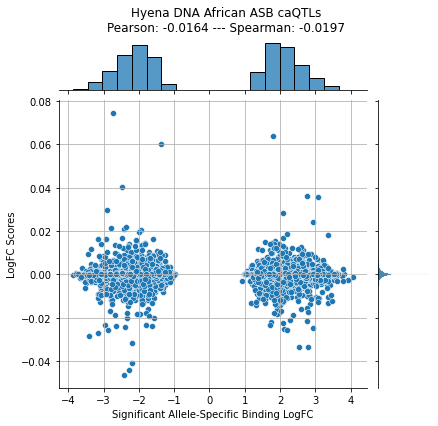

In [36]:
afr_asb = variants_Afr_ASB_CaQTLs_probed_counts(f"/oak/stanford/groups/akundaje/projects/dnalm_benchmark/variants/probing/{model_name}/GM12878/Afr.ASB.CaQTLS.counts.tsv")
effect_size_logfc(afr_asb, f"{model} African ASB caQTLs")

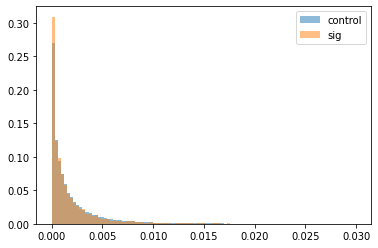

In [37]:
bins = np.linspace(0, 0.03, 100)  # Define the bins to cover the range of both datasets

counts_ctrl, bins_ctrl = np.histogram(ctrl_counts, bins=bins)
fractions_ctrol = counts_ctrl / counts_ctrl.sum()
plt.hist(bins_ctrl[:-1], bins_ctrl, weights=fractions_ctrol, alpha=0.5, label="control")
counts_sig, bins_sig = np.histogram(sig_counts, bins=bins)
fractions_sig = counts_sig / counts_sig.sum()
plt.hist(bins_sig[:-1], bins_sig, weights=fractions_sig, alpha=0.5, label="sig")
plt.legend()

In [38]:
df = pd.read_csv(f"/oak/stanford/groups/akundaje/projects/dnalm_benchmark/variants/probing/{model_name}/GM12878/Afr.CaQTLS.counts.tsv", sep="\t")

In [39]:
used_variants = df[df["IsUsed"]==True]
np.min(used_variants["pval"]), np.max(used_variants["pval"])

(2.92178e-41, 0.999995)

In [40]:
used_variants[-np.log10(used_variants["pval"]) >= 3]

,chr_hg38,pos_hg38,allele1,allele2,snp_id,label,IsUsed,pval,beta,enformer.encsr000emt.variantscore.sad,...,chrombpnet.encsr095qnb.variantscore.csr,chrombpnet.encsr095qnb.variantscore.pval,dbsnp_rsid,region,snp,distance,se,abs_beta,allele1_counts,allele2_counts
9,chr1,906982,C,T,1_906982_C_T,True,True,4.802840e-06,-0.520262,-0.000453,...,0.009527,0.007020,rs28540380,1:906596:907043,1_906982_C_T,385,0.106740,0.520262,1.099346,1.096204
12,chr1,921203,G,A,1_921203_G_A,True,True,6.892040e-06,0.905971,0.000342,...,0.025396,0.002171,rs141671872,1:921132:921332,1_921203_G_A,70,0.189412,0.905971,1.113596,1.113943
26,chr1,976215,A,G,1_976215_A_G,True,True,2.622420e-11,-0.615266,-0.001241,...,0.004710,0.014595,rs7417106,1:975872:976361,1_976215_A_G,342,0.080637,0.615266,1.124413,1.124413
61,chr1,1038819,T,C,1_1038819_C_T,True,True,1.169820e-11,0.700579,-0.001108,...,0.004286,0.016022,rs2465131,1:1038791:1039035,1_1038819_C_T,27,0.089787,0.700579,1.048456,1.046355
62,chr1,1038845,G,A,1_1038845_A_G,True,True,1.169820e-11,0.700579,0.004140,...,0.017407,0.003498,rs2488995,1:1038791:1039035,1_1038845_A_G,53,0.089787,0.700579,1.060424,1.060197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219124,chr22,47059799,C,G,22_47059799_C_G,True,True,1.635960e-08,-0.841238,-0.000066,...,0.000529,0.093866,rs16996273,22:47059755:47060002,22_47059799_C_G,43,0.135262,0.841238,1.119004,1.118925
219125,chr22,47059876,A,G,22_47059876_A_G,True,True,3.221320e-13,-1.117690,-0.002700,...,0.072373,0.000428,rs16996275,22:47059755:47060002,22_47059876_A_G,120,0.130493,1.117690,1.120283,1.120666
219131,chr22,47918714,G,A,22_47918714_G_A,True,True,3.198390e-34,1.186160,0.002985,...,0.038834,0.001195,rs5768156,22:47918594:47919371,22_47918714_G_A,119,0.059816,1.186160,1.118111,1.115182
219133,chr22,47919267,A,G,22_47919267_A_G,True,True,2.085350e-13,0.847828,-0.000040,...,0.000558,0.090415,rs5768157,22:47918594:47919371,22_47919267_A_G,672,0.097935,0.847828,1.107967,1.108649


In [52]:
used_variants[-np.log10(used_variants["pval"]) <= 3]

,chr_hg38,pos_hg38,allele1,allele2,snp_id,label,IsUsed,pval,beta,enformer.encsr000emt.variantscore.sad,...,chrombpnet.encsr095qnb.variantscore.csr,chrombpnet.encsr095qnb.variantscore.pval,dbsnp_rsid,region,snp,distance,se,abs_beta,allele1_counts,allele2_counts
2,chr1,870176,T,A,1_870176_T_A,False,True,0.071532,-0.250142,-0.000139,...,0.001262,0.048612,rs72631880,1:869800:870282,1_870176_T_A,375,0.137133,0.250142,1.124413,1.124413
4,chr1,905373,C,T,1_905373_T_C,False,True,0.188152,-0.130176,-0.000071,...,0.003640,0.018781,rs4970382,1:904938:905544,1_905373_T_C,434,0.098145,0.130176,1.124413,1.124413
8,chr1,906870,A,G,1_906870_A_G,False,True,0.151325,-0.335979,-0.000669,...,0.024808,0.002238,rs148658266,1:906596:907043,1_906870_A_G,273,0.232118,0.335979,1.099267,1.098543
13,chr1,959193,G,A,1_959193_G_A,False,True,0.570435,-0.048551,-0.000086,...,0.000299,0.136079,rs13303010,1:958757:959472,1_959193_G_A,435,0.085245,0.048551,1.124413,1.124413
14,chr1,959339,C,T,1_959339_C_T,False,True,0.401773,0.071807,0.000328,...,0.001762,0.036620,rs187243360,1:958757:959472,1_959339_C_T,581,0.085227,0.071807,1.124413,1.124413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219372,chr22,50583387,C,G,22_50583387_C_G,False,True,0.717574,-0.039875,0.000002,...,0.000294,0.137602,rs112714656,22:50583202:50583631,22_50583387_C_G,184,0.109887,0.039875,1.122892,1.122433
219373,chr22,50620690,T,G,22_50620690_G_T,False,True,0.178047,0.101003,-0.001514,...,0.001665,0.038481,rs3091400,22:50620470:50621609,22_50620690_G_T,219,0.074396,0.101003,1.124413,1.124413
219374,chr22,50621055,G,A,22_50621055_G_A,False,True,0.411079,0.094050,-0.000848,...,0.002349,0.028349,rs76733141,22:50620470:50621609,22_50621055_G_A,584,0.113873,0.094050,1.091937,1.088542
219375,chr22,50621446,T,C,22_50621446_T_C,False,True,0.217021,-0.123608,0.000378,...,0.000134,0.213307,rs75395540,22:50620470:50621609,22_50621446_T_C,975,0.099411,0.123608,1.100482,1.099189


In [42]:
paths = glob.glob("/oak/stanford/groups/akundaje/projects/dnalm_benchmark/variants/probing/hyenadna-large-1m-seqlen-hf/GM12878/*")

In [43]:
counts_data = pd.read_csv("/oak/stanford/groups/akundaje/projects/dnalm_benchmark/variants/probing/DNABERT-2-117M/GM12878/Eu.CaQTLS.counts.tsv", sep="\t")
data = pd.read_csv("/oak/stanford/groups/akundaje/anusri/variant-benchmakring/Eu.CaQTLS.tsv", sep="\t")

In [44]:
data.shape[0]

226346

In [45]:
counts_data

,chr,Pos,Ref,Alt,RsID,Peak,AF,Inside_Peak,P_Lead,Beta,...,ENCSR637XSC.sub.50M.abs_logfc_x_jsd_x_max_percentile.mean.pval,ENCSR000EMT.logfc.mean,ENCSR000EMT.jsd_sign.mean,ENCSR000EMT.abs_logfc_x_jsd_x_max_percentile.mean,ENCSR000EMT.abs_logfc_x_jsd_x_max_percentile.mean.pval,DNASE_SAD,DNASE_SAR,IsUsed,allele1_counts,allele2_counts
0,chr1,875770,A,G,rs4970379,3,0.62500,2,0.044994,0.155446,...,0.121047,-0.012129,-0.010357,0.000075,0.271773,0.000178,0.000233,True,0.410853,0.411058
1,chr1,930533,C,G,rs3128110,5,0.35435,0,0.099392,0.174020,...,0.451472,0.013312,0.008129,0.000003,0.697475,-0.000080,-0.000097,True,0.386183,0.387652
2,chr1,565286,C,T,rs1578391,7,0.59780,1,0.998561,0.886884,...,0.379356,-0.018964,-0.015143,0.000026,0.527638,0.000008,0.000011,True,0.412326,0.412039
3,chr1,569204,T,C,rs112660509,8,0.40125,1,0.477613,0.251458,...,0.191231,0.031934,0.020760,0.000623,0.105496,0.000026,0.000036,True,0.396623,0.397426
4,chr1,748141,G,A,rs2427893,10,0.05005,0,0.988758,0.347965,...,0.159250,-0.020819,-0.011900,0.000122,0.266678,-0.000028,-0.000037,True,0.407663,0.407715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226341,chr22,51021271,T,C,rs540889063,277122,0.05500,1,0.362698,0.010717,...,0.108499,-0.025875,-0.012848,0.000313,0.120968,0.000096,0.000099,True,0.425780,0.425276
226342,chr22,51059483,G,A,rs76733141,277123,0.06000,1,0.553273,-0.061982,...,0.102590,-0.067028,-0.015264,0.001260,0.054735,-0.000848,-0.001081,True,0.407067,0.406993
226343,chr22,51066552,C,G,rs6151406,277124,0.06000,1,0.921861,0.087364,...,0.036352,-0.084489,-0.024247,0.001716,0.030853,-0.000557,-0.000713,True,0.422479,0.422674
226344,chr22,51082407,T,A,rs62241515,277125,0.42505,1,0.315251,-0.016347,...,0.593201,-0.009835,-0.006762,0.000003,0.707481,0.000029,0.000038,True,0.379871,0.378011


In [46]:
threshold = np.arange(3,23,2)[0]
threshold = 3
filtered_var_eucaqtls = counts_data[(counts_data["Inside_Peak"]==True) &
                                          (counts_data["IsUsed"]==True)].copy(deep=True)
    
filtered_var_eucaqtls_df_sig = filtered_var_eucaqtls[filtered_var_eucaqtls["Log10_BF"]>threshold].copy(deep=True)
filtered_var_eucaqtls_df_ctrl = filtered_var_eucaqtls[filtered_var_eucaqtls["Log10_BF"]<-1].copy(deep=True)

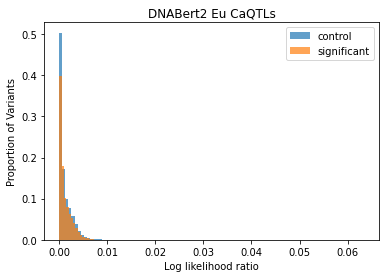

In [47]:
data1 = np.abs(filtered_var_eucaqtls_df_ctrl["allele1_counts"] - filtered_var_eucaqtls_df_ctrl["allele2_counts"])

counts1, bins1 = np.histogram(data1, bins=100)
fractions1 = counts1 / counts1.sum()
plt.hist(bins1[:-1], bins1, weights=fractions1, alpha=0.7, label="control")

data2 = np.abs(filtered_var_eucaqtls_df_sig["allele1_counts"] - filtered_var_eucaqtls_df_sig["allele2_counts"])
counts2, bins2 = np.histogram(data2, bins=100)
fractions2 = counts2 / counts2.sum()

plt.hist(bins2[:-1], bins2, weights=fractions2, alpha=0.7, label="significant")
plt.xlabel("Log likelihood ratio")
plt.ylabel("Proportion of Variants")
plt.title("DNABert2 Eu CaQTLs")
# plt.xlim([-0.0001,0.01])
plt.legend()
plt.show()

In [48]:
fractions1.sum(), fractions2.sum()

(1.0, 1.0)

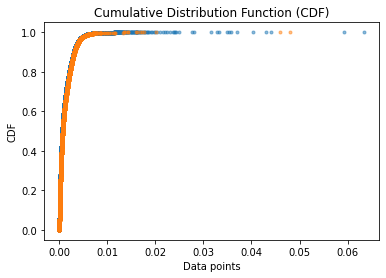

In [49]:
data_sorted1 = np.sort(data1)  
cdf1 = np.arange(1, len(data1) + 1) / len(data1)  
plt.plot(data_sorted1, cdf1, marker='.', linestyle='none', alpha=0.5)
plt.xlabel('Data points')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function (CDF)')

data_sorted2 = np.sort(data2)  
cdf2 = np.arange(1, len(data2) + 1) / len(data2)  
plt.plot(data_sorted2, cdf2, marker='.', linestyle='none', alpha=0.5)
plt.xlabel('Data points')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function (CDF)')
plt.show()

Text(0.5, 1.0, 'Control vs. Significant for DNABert2 Eu CaQTLs')

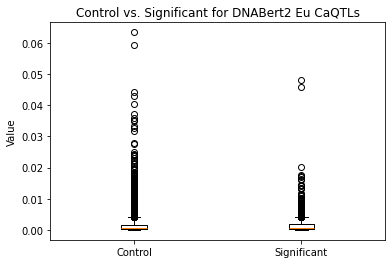

In [50]:
data = [data1, data2]

# Create the boxplot
plt.boxplot(data)

# Customizing the plot
plt.xticks([1, 2], ['Control', 'Significant'])  # Set custom labels for the x-axis
plt.ylabel('Value')  # Label for the y-axis
plt.title('Control vs. Significant for DNABert2 Eu CaQTLs')  # Title of the plot